<a href="https://colab.research.google.com/github/hernansalinas/CursoMetodosComputacionales/blob/main/Material_sesiones/ExamenFinal_2024_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evaluación final Métodos computacionales

Profesor: Hernan D. Salinas

Universidad de Antioquia

El examen consta de siete puntos, cada uno con igual valor. Puede utilizar librerías para su solución. La entrega se realiza a través de GitHub. El plazo de entrega es el jueves 8 de agosto a las 11:59 pm. Evite el uso de inteligencia artificial.



En este examen, estudiaremos la caída de un lápiz en posición vertical. El lápiz puede ser modelado como un cuerpo rígido, cuyas ecuaciones de movimiento respecto a su centro de masa pueden ser expresadas de la siguiente manera, de acuerdo con la imagen mostrada en la figura:



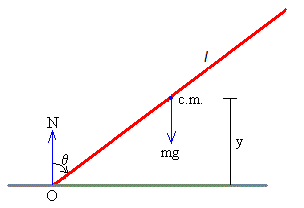


## Ecuaciones de movimiento

### Ecuaciones de movimiento del centro de masa

De acuerdo con la segunda ley de Newton, la ecuación de movimiento a lo largo de la vertical ($y$) puede ser escrita como:

\begin{equation}
m\frac{d^2y}{dt^2} = N - mg
\end{equation}

donde $m$ es la masa de la lápiz, $N$ es la fuerza normal y $g$ es la aceleración de la gravedad. Escribiendo las ecuaciones en términos del ángulo $\theta$, tenemos que:

\begin{equation}
-m\frac{l}{2}\cos \theta \left(\frac{d\theta}{dt} \right)^2 - m\frac{l}{2}\sin \theta \frac{d^2\theta}{dt^2} = N - mg
\end{equation}

### Ecuaciones de rotación del centro de masa

La sumatoria de momentos de fuerza se puede escribir como sigue:

\begin{equation}
I_c\frac{d^2\theta}{dt^2} = N\frac{l}{2} \sin \theta
\end{equation}

donde $I_c = \frac{1}{12}ml^2$ es el momento de inercia de una lápiz de masa $m$ y longitud $l$ respecto a un eje perpendicular a la lápiz en su centro de masa.

Reemplazando el valor de la normal en la ecuación anterior, obtenemos que la ecuación de movimiento para la posición angular está dada por:

\begin{equation}
\frac{d^2 \theta}{dt^2} = \left( \frac{\frac{2g}{l} - \left(\frac{d\theta}{dt}\right)^2\cos \theta }{\frac{1}{3} + \sin^2 \theta} \right)\sin \theta
\end{equation}

Podemos resolver la ecuación anterior si conocemos las condiciones iniciales: $\theta = \theta_0$ en $t = 0$ y $\frac{d\theta}{dt} = \omega_0 = 0$.

Su tarea en este examen será modelar el movimiento de caída del lápiz. Para ello, asuma que la longitud del lápiz es:

$L = 0.1$ m, $g = 9.8$ m/s² y realice lo siguiente:

1. Utilizando `odeint`, encuentre la solución a la ecuación diferencial para obtener: la posición angular $\theta$, la posición del centro de masa $y = \frac{l}{2}\cos \theta$ y la rapidez angular como función del tiempo, asumiendo que $\theta_0 = \pi/12$, $\omega_0 = 0$.

   Nota: El lápiz llega al piso cuando el ángulo es $\theta = \pi/2$.

2. Empleando `matplotlib`, construya tres gráficos con la información del punto anterior, asegurándose de que tengan las unidades respectivas.

3. Con el programa construido en los puntos 1 y 2, analice el efecto del paso del tiempo en la posición angular, la posición del centro de masa y la rapidez angular. Aproximadamente, ¿a partir de qué tiempo la solución puede ser considerada válida?

4. Con el paso del tiempo calibrado, construya cuatro curvas en una misma figura de la posición angular como función del tiempo, para ángulos iniciales de caída de: $\theta_0 = \pi/12$, $\theta_0 = \pi/6$, $\theta_0 = \pi/4$, $\theta_0 = \pi/3$ y $\omega_0 = 0$.

5. Con los resultados obtenidos, realice una interpolación para cada figura del inciso anterior y encuentre el tiempo de caída, empleando algún método conocido de raíces.

6. El Tiempo que tarda el lápiz en caer $T$, puede ser deducido de la ecuación de conservación de la energía, el cual viene dado por la siguiente integral:  


\begin{equation}
T = \frac{1}{2}\sqrt{\frac{l}{g}} \int_{\theta_0}^{\pi/2} \sqrt{\frac{1/3 + \sin^2 \theta}{\cos \theta_0 - \cos \theta}} \, \mathrm{d}\theta
\end{equation}

Valide sus soluciones del tiempo de caída utilizando la siguiente ecuación.

7. Finalmente, realice un gráfico de $T$ como función de $\theta_0$. ¿Qué puede concluir?


**Referencias**: Para más detalle de los cálulos ver:

1. Crawford F. S. Problem: Moments to remember. Am. J. Phys. 57 (2) February 1989, pp. 105, solución 177
2. http://www.sc.ehu.es/sbweb/fisica3/solido/lapiz/lapiz.html

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.interpolate import CubicSpline
L = 0.1 #m
g = 9.8 #m/s
omega_0 = 0
theta_0 = np.pi/12
ta =0
tb = 16
dt = 0.000001
N = int((tb-ta)/dt)
t = np.linspace(ta, tb, N)
U = [theta_0,omega_0]
def fun(U, t, g, L):
    """
    Calcula las derivadas del ángulo y la velocidad angular para un péndulo simple.

    Args:
        theta (float): Ángulo de desplazamiento (en radianes).
        omega (float): Velocidad angular (en radianes/segundo).
        g (float): Aceleración debida a la gravedad (en m/s²).
        L (float): Longitud del hilo del péndulo (en metros).
        M (float): Masa del péndulo.

    Returns:
        Array: Derivadas de theta y omega.
    """
    theta, omega = U
    dtheta_dt = omega
    domega_dt = (2*g/L - (dtheta_dt**2)*np.cos(theta))/(1/3 + np.sin(theta)**2)*np.sin(theta)
    return np.array([dtheta_dt, domega_dt])

In [41]:
U = odeint(fun, U, t, args=(g, L))
theta_ = U[:,0]
omega_ = U[:,1]
y_cm = L/2 * np.cos(theta_)

In [42]:
theta1 = np.array([])
for i in range(len(theta_)):
  if theta_[i] < np.pi/2:
    theta1 = np.append(theta1, theta_[i])
  else:
    theta1 = np.append(theta1, theta_[i])
    break

In [43]:
omega1 = omega_[:len(theta1)]
y_cm = y_cm[:len(theta1)]
t = t[:len(theta1)]

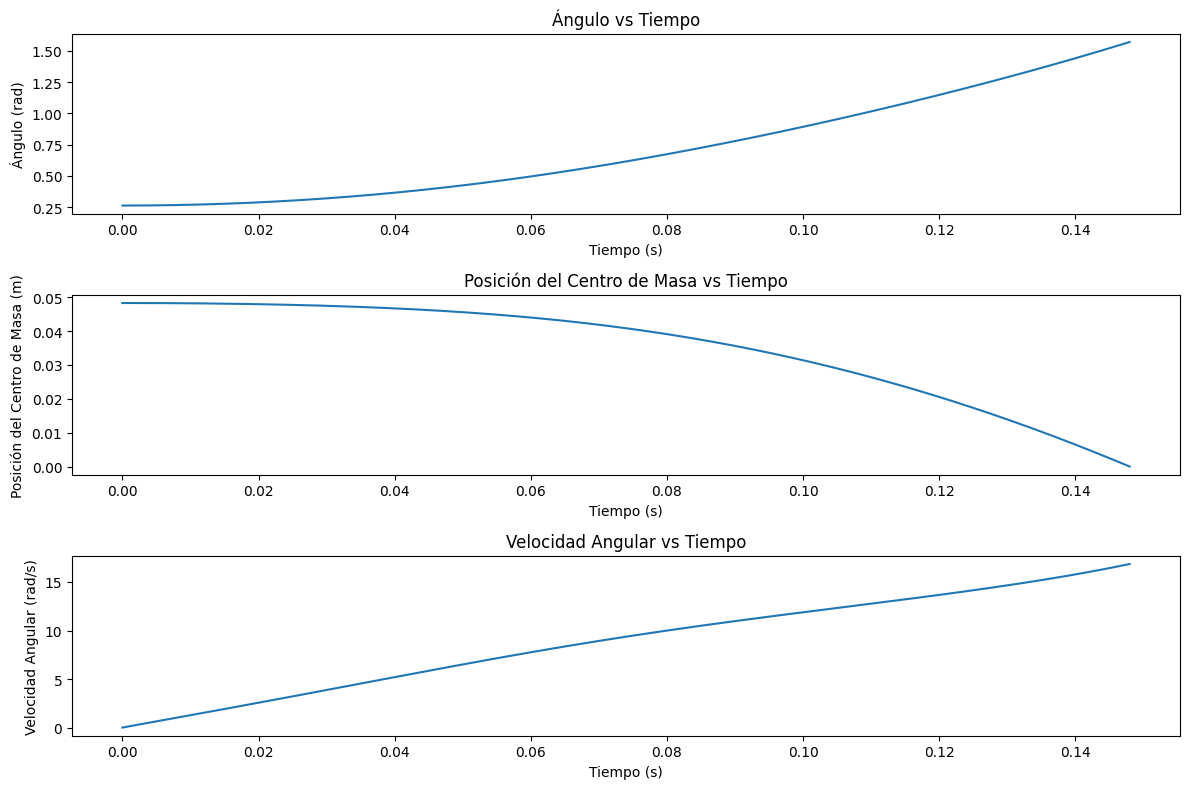

In [44]:
plt.figure(figsize=(12, 8))

# Gráfico de θ vs. tiempo
plt.subplot(3, 1, 1)
plt.plot(t, theta1)
plt.xlabel('Tiempo (s)')
plt.ylabel('Ángulo (rad)')
plt.title('Ángulo vs Tiempo')

# Gráfico de la posición del centro de masa vs. tiempo
plt.subplot(3, 1, 2)
plt.plot(t, y_cm)
plt.xlabel('Tiempo (s)')
plt.ylabel('Posición del Centro de Masa (m)')
plt.title('Posición del Centro de Masa vs Tiempo')

# Gráfico de la velocidad angular vs. tiempo
plt.subplot(3, 1, 3)
plt.plot(t, omega1)
plt.xlabel('Tiempo (s)')
plt.ylabel('Velocidad Angular (rad/s)')
plt.title('Velocidad Angular vs Tiempo')

plt.tight_layout()
plt.show()

PUNTO 3

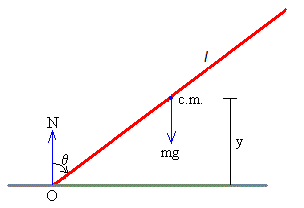


Al analizar el crecimiento y decrecimiento en las gráficas, se puede observar que el comportamiento del lápiz presenta características distintas en cada aspecto:

Ángulo (𝜃): Muestra un aumento exponencial a medida que el lápiz cae.

Centro de masa (𝑦cm): Experimenta una disminución continua a medida que el lápiz se inclina.

Velocidad angular (w): Sigue un patrón lineal, reflejando la aceleración constante del lápiz debido a la gravedad.

el tiempo en el que la solucion es valida, es aquella en el que el angulo llega a $\theta = \pi/2$, esto quiere decir en el transcurso que el lapiz va cayendo hasta caer completamente

punto 4

In [45]:
t_final = t[-1]
print(f"El tiempo que tarda en caer el lapiz es {t[-1]:.3f} s")

El tiempo que tarda en caer el lapiz es 0.148 s


El tiempo que tarda en caer el lapiz es 0.148 s


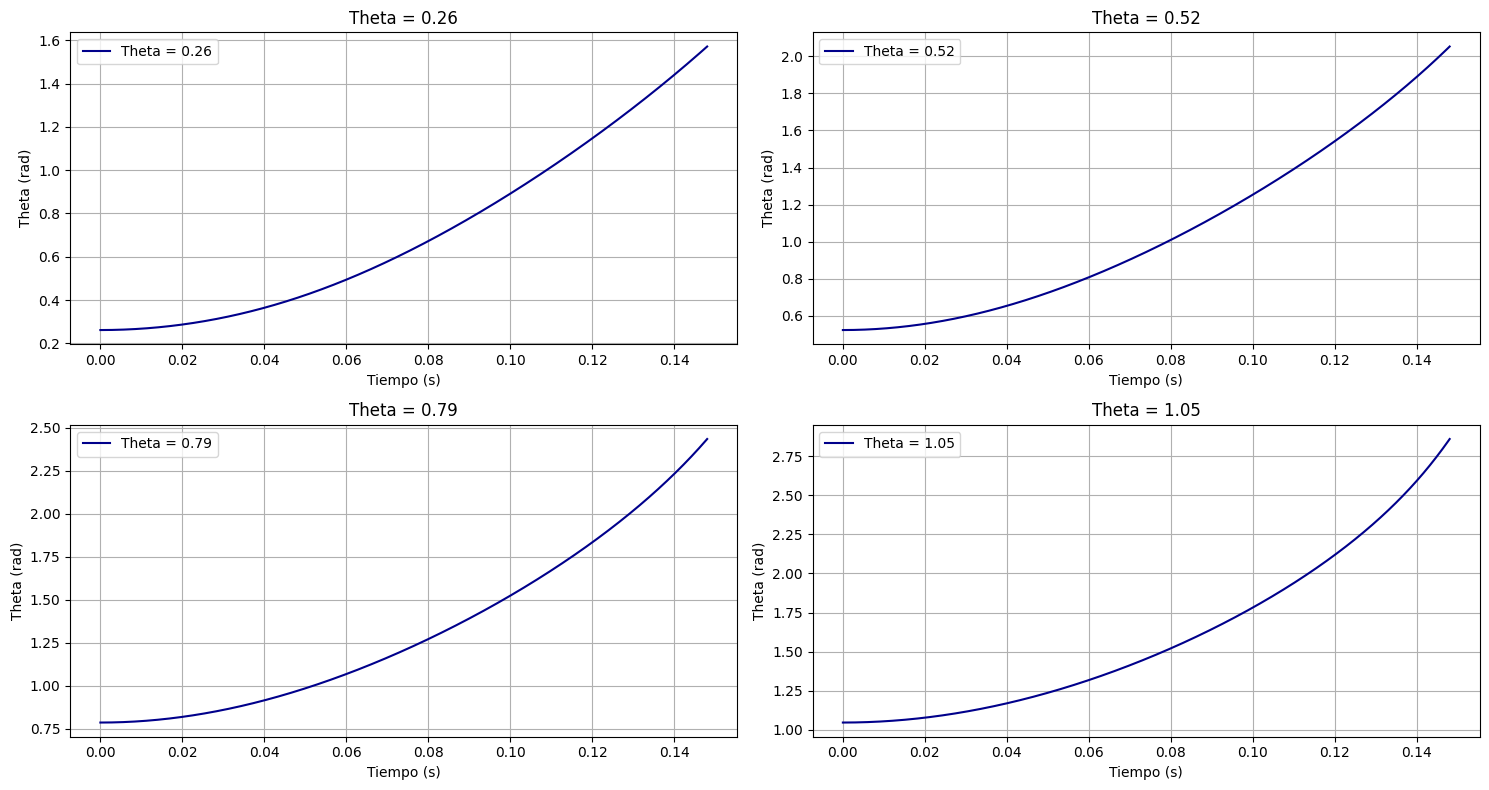

In [46]:
t_final = t[-1]
print(f"El tiempo que tarda en caer el lapiz es {t[-1]:.3f} s")
L = 0.1 #m
g = 9.8 #m/s
omega_0 = 0
theta_0 = np.array([np.pi/12,np.pi/6,np.pi/4,np.pi/3])
ta =0
tb = t_final
dt = 0.000001
N = int((tb-ta)/dt)
t = np.linspace(ta, tb, N)
fig, axes = plt.subplots(2, 2, figsize=(15, 8))
axes = axes.flatten()
for i in range(len(theta_0)):
    U0 = [theta_0[i], omega_0]
    U = odeint(fun, U0, t, args=(g, L))
    ax = axes[i]
    ax.plot(t, U[:, 0], label=f'Theta = {theta_0[i]:.2f}', color = "#00008B")
    ax.set_xlabel('Tiempo (s)')
    ax.set_ylabel('Theta (rad)')
    ax.set_title(f'Theta = {theta_0[i]:.2f}')
    ax.legend()
    ax.grid()
plt.tight_layout()
plt.show()

5. Con los resultados obtenidos, realice una interpolación para cada figura del inciso anterior y encuentre el tiempo de caída, empleando algún método conocido de raíces.

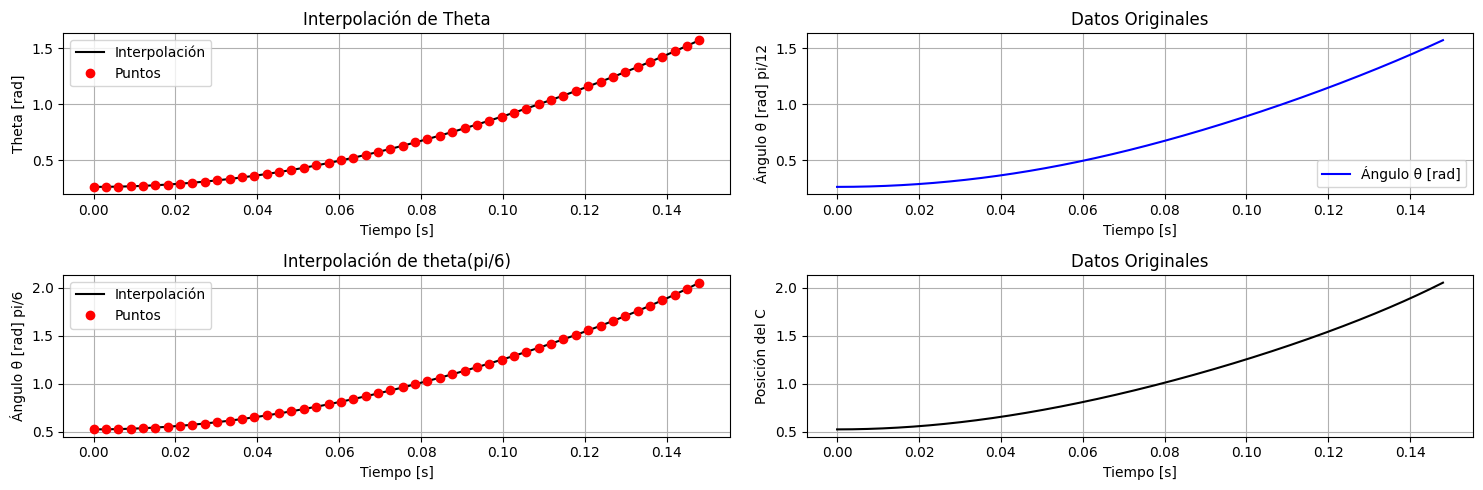

In [60]:
dt = 0.0001
ta = 0
tb = t_final # Calculado en el 3 punto
N = int((tb-ta)/dt)
t = np.linspace(ta,tb,N)
U0 = [np.pi/12, omega_0]
U = odeint(fun, U0, t, args=(g, L))
theta = U[:, 0]
omega = U[:, 1]
cs = CubicSpline(t, theta) # Esto me calcula theta(t)
t_interp = np.linspace(t.min(), t.max(), 50)
U1 = [np.pi/6, omega_0]
U = odeint(fun, U1, t, args=(g, L))
theta1 = U[:, 0]
omega1 = U[:, 1]
cs1 = CubicSpline(t, theta1) # Esto me calcula theta(t)
U2 = [np.pi/4, omega_0]
U = odeint(fun, U2, t, args=(g, L))
theta2 = U[:, 0]
omega2 = U[:, 1]
cs2 = CubicSpline(t, theta2)
U3 = [np.pi/3, omega_0]
U = odeint(fun, U3, t, args=(g, L))
theta3 = U[:, 0]
omega3 = U[:, 1]
cs3 = CubicSpline(t, theta3)
plt.figure(figsize=(15, 5))

plt.subplot(2, 2, 1)
plt.plot(t_interp, cs(t_interp), "k-", label="Interpolación")
plt.plot(t_interp, cs(t_interp), "ro", label="Puntos")
plt.xlabel('Tiempo [s]')
plt.ylabel("Theta [rad]")
plt.title('Interpolación de Theta')
plt.legend()
plt.grid()

plt.subplot(2, 2, 2)
plt.plot(t, theta, 'b-', label='Ángulo θ [rad]')
plt.xlabel('Tiempo [s]')
plt.ylabel('Ángulo θ [rad] pi/12')
plt.title('Datos Originales')
plt.legend(loc='lower right')
plt.grid()

plt.subplot(2, 2, 3)
plt.plot(t_interp,cs1(t_interp), "k-", label="Interpolación")
plt.plot(t_interp, cs1(t_interp), "ro", label="Puntos")
plt.xlabel('Tiempo [s]')
plt.ylabel('Ángulo θ [rad] pi/6')
plt.title('Interpolación de theta(pi/6)')
plt.legend()
plt.grid()

plt.subplot(2, 2, 4)
plt.plot(t, theta1, '#000000', label='Angulo pi/6')
plt.xlabel('Tiempo [s]')
plt.ylabel('Posición del C')
plt.title('Datos Originales')
plt.legend
plt.grid()

plt.tight_layout()
plt.show()





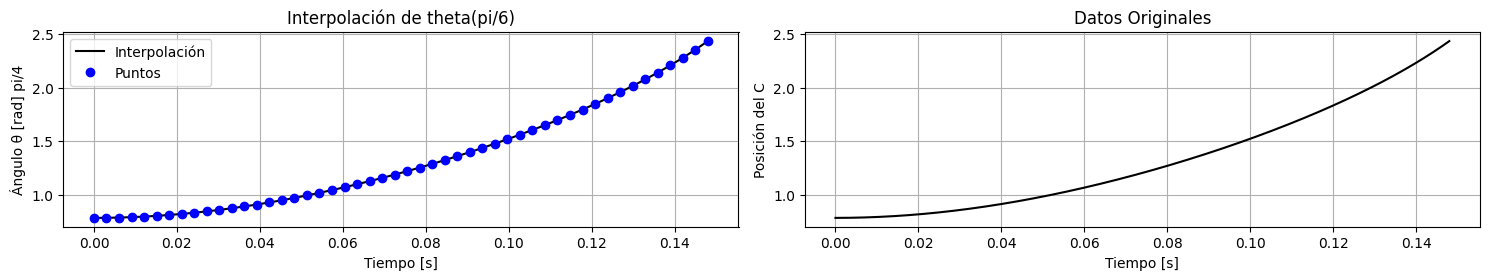

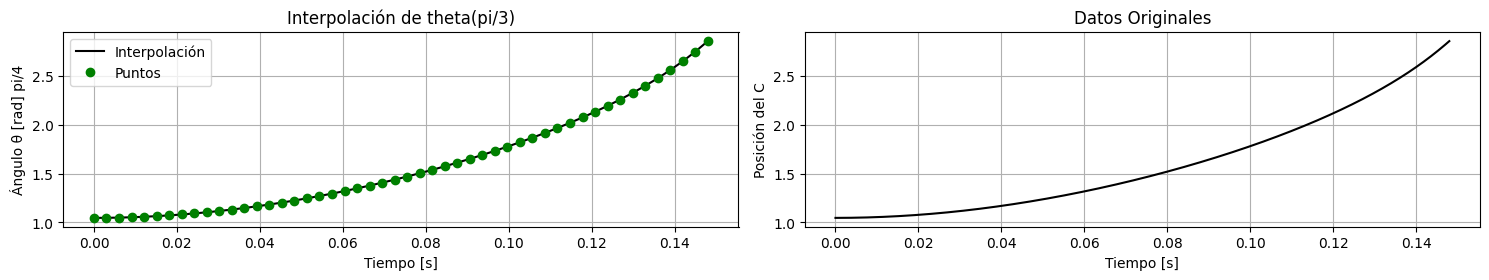

In [65]:
plt.figure(figsize=(15, 5))
plt.subplot(2, 2, 1)
plt.plot(t_interp,cs2(t_interp), "k-", label="Interpolación")
plt.plot(t_interp, cs2(t_interp), "bo", label="Puntos")
plt.xlabel('Tiempo [s]')
plt.ylabel('Ángulo θ [rad] pi/4')
plt.title('Interpolación de theta(pi/6)')
plt.legend()
plt.grid()

plt.subplot(2, 2, 2)
plt.plot(t, theta2, '#000000', label='Angulo pi/4')
plt.xlabel('Tiempo [s]')
plt.ylabel('Posición del C')
plt.title('Datos Originales')
plt.legend
plt.grid()

plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 5))
plt.subplot(2, 2, 3)
plt.plot(t_interp,cs3(t_interp), "k-", label="Interpolación")
plt.plot(t_interp, cs3(t_interp), "go", label="Puntos")
plt.xlabel('Tiempo [s]')
plt.ylabel('Ángulo θ [rad] pi/4')
plt.title('Interpolación de theta(pi/3)')
plt.legend()
plt.grid()

plt.subplot(2, 2, 4)
plt.plot(t, theta3, '#000000', label='Angulo pi/3')
plt.xlabel('Tiempo [s]')
plt.ylabel('Posición del C')
plt.title('Datos Originales')
plt.legend
plt.grid()

plt.tight_layout()
plt.show()

ahora hallaremos los tiempos de caida para cada angulo.

In [68]:
def theta_gorro(U,t):
  theta = U[:,0]
  parametro = np.argmax(theta>np.pi/2)
  if theta[parametro]>np.pi/2:
    return U[:parametro+1], t[:parametro+1]
  else:
    return U, t

In [79]:
theta_0 = np.array([np.pi/12,np.pi/6,np.pi/4,np.pi/3])
sols = []
tiempos = []
for thetat in theta_0:
  omega_0 =0
  U0 = [thetat, omega_0]
  U = odeint(fun, U0, t, args=(g, L))
  sol, tiempo = theta_gorro(U,t)
  sols.append(sol)
  tiempos.append(tiempo)
  print(f"el angulo inicial es {thetat} y el tiempo de caida es {tiempo[-1]}")


el angulo inicial es 0.2617993877991494 y el tiempo de caida es 0.14798400924900057
el angulo inicial es 0.5235987755982988 y el tiempo de caida es 0.12185151505820954
el angulo inicial es 0.7853981633974483 y el tiempo de caida es 0.10332848277738065
el angulo inicial es 1.0471975511965976 y el tiempo de caida es 0.08420470350366001


6 punto

In [52]:
theta_0 = np.pi/12
from scipy.integrate import quad

def integral(theta):
    numerador = 1/3 + np.sin(theta)**2
    denominador = np.cos(theta_0) - np.cos(theta)
    return np.sqrt(numerador / denominador)

valor , _= quad(integral, theta_0, np.pi/2)

# Cálculo del período
T = (1 / 2) * np.sqrt(L / g) * valor
print(f"El tiempo que tarda en caer el lapiz para pi/12 es {T:.3f} s")


El tiempo que tarda en caer el lapiz para pi/12 es 0.148 s


In [56]:
theta_1 = np.pi/6
from scipy.integrate import quad

def integral(theta):
    numerador = 1/3 + np.sin(theta)**2
    denominador = np.cos(theta_1) - np.cos(theta)
    return np.sqrt(numerador / denominador)

valor , _= quad(integral, theta_1, np.pi/2)

# Cálculo del período
T = (1 / 2) * np.sqrt(L / g) * valor
print(f"El tiempo que tarda en caer el lapiz para pi/6 es {T:.3f} s")

theta_2 = np.pi/4

def integral(theta):
    numerador = 1/3 + np.sin(theta)**2
    denominador = np.cos(theta_2) - np.cos(theta)
    return np.sqrt(numerador / denominador)

valor , _= quad(integral, theta_2, np.pi/2)

# Cálculo del período
T = (1 / 2) * np.sqrt(L / g) * valor
print(f"El tiempo que tarda en caer el lapiz para pi/4 es {T:.3f} s")

theta_3 = np.pi/3

def integral(theta):
    numerador = 1/3 + np.sin(theta)**2
    denominador = np.cos(theta_3) - np.cos(theta)
    return np.sqrt(numerador / denominador)

valor , _= quad(integral, theta_3, np.pi/2)

# Cálculo del período
T = (1 / 2) * np.sqrt(L / g) * valor
print(f"El tiempo que tarda en caer el lapiz para pi/3 es {T:.3f} s")

El tiempo que tarda en caer el lapiz para pi/6 es 0.122 s
El tiempo que tarda en caer el lapiz para pi/4 es 0.103 s
El tiempo que tarda en caer el lapiz para pi/3 es 0.084 s


punto 7

<ipython-input-56-a52c193de400>:33: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(numerador / denominador)
<ipython-input-58-999fd240808d>:4: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  valor , _= quad(integral, theta[i], np.pi/2)
<ipython-input-56-a52c193de400>:33: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(numerador / denominador)
<ipython-input-58-999fd240808d>:4: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be 

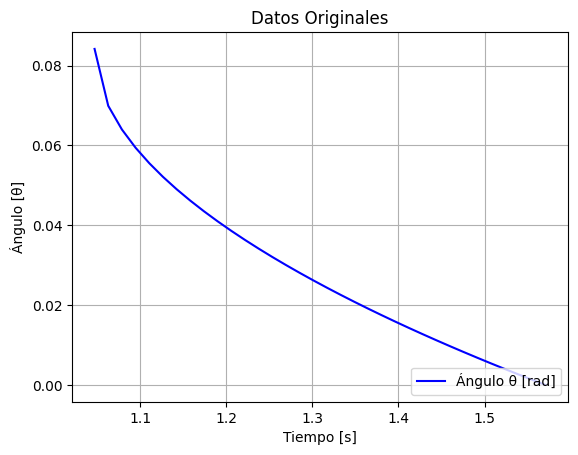

In [58]:
theta = np.linspace(0, np.pi/2, 100)
T_ = np.zeros(len(theta))
for i in  range(len(theta)):
  valor , _= quad(integral, theta[i], np.pi/2)
  T = (1 / 2) * np.sqrt(L / g) * valor
  T_[i] = T
plt.plot(theta, T_, 'b-', label='Ángulo θ [rad]')
plt.xlabel('Tiempo [s]')
plt.ylabel('Ángulo [θ]')
plt.title('Datos Originales')
plt.legend(loc='lower right')
plt.grid()
